In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
iris = pd.read_excel("../../Data/Iris.xls")
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   iris         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [3]:
iris_class = {'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}
iris['species_num'] = [iris_class[i] for i in iris.iris]
iris.head()

,sepallength,sepalwidth,petallength,petalwidth,iris,species_num
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [4]:
def make_color(value):
    color = 'yellow'
    if value == 0:
        color = 'red'
    elif value == 1:
        color = 'green'
    else:
        color = 'blue'
    return color

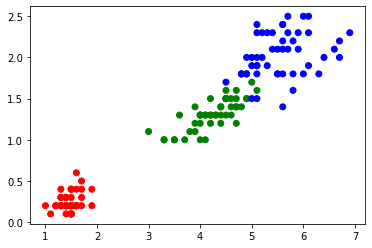

In [5]:
pentallength = iris.petallength.values
petalwidth = iris.petalwidth.values
types = iris.species_num.values
color= [make_color(x) for x in types]
plt.scatter(pentallength, petalwidth, color=color)
plt.show()

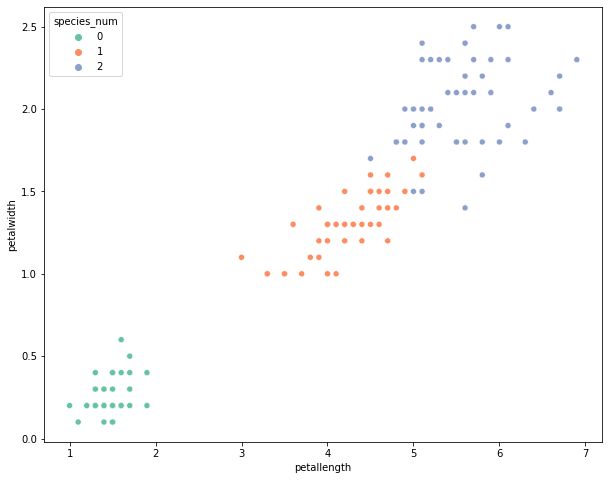

In [6]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.scatterplot(x="petallength", y="petalwidth",
hue="species_num", palette="Set2", data=iris)
plt.show()

In [7]:
X = iris.drop(['iris', 'species_num'], axis=1)
y = iris.species_num

In [8]:
X.head()

,sepallength,sepalwidth,petallength,petalwidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species_num, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42)

In [12]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [13]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Logistic
clf = LogisticRegression(solver='lbfgs', multi_class='multinomial')

In [14]:
clf.fit(X_train, y_train)
clf

LogisticRegression(multi_class='multinomial')

In [15]:
y_pred = clf.predict(X_test)

In [16]:
# Kiểm tra độ chính xác
print("The prediction accuracy is: ", clf.score(X_test,y_test)*100,"%")

The prediction accuracy is:  100.0 %


In [17]:
df = pd.DataFrame({'Actual': pd.DataFrame(y_test.values)[0].values,
                   'Prediction': pd.DataFrame(y_pred)[0].values})
df.head()

,Actual,Prediction
0,1,1
1,0,0
2,2,2
3,1,1
4,1,1


In [18]:
x_now = [[4.8, 3.3, 1.6, 0.25]]
y_now = clf.predict(x_now)
y_now

array([0], dtype=int64)

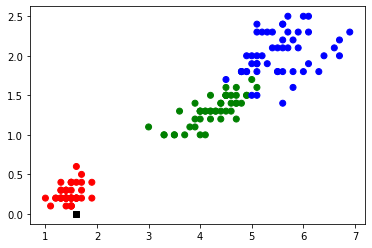

In [19]:
types = iris.species_num.values
color= [make_color(x) for x in types]
plt.scatter(pentallength, petalwidth, color=color)
plt.scatter(x_now[0][2], y_now, color='k', marker = 's')
plt.show()